In [53]:
# Import frameworks
import pandas as pd
from sklearn.model_selection import train_test_split

In [54]:
# Create a data frame from the csv file
data = pd.read_csv('model_ready_data.csv')

# Split the data into training and testing data
training_data, testing_data = train_test_split(data, test_size=0.4, shuffle=True)

# Save the training and testing data to csv files
training_data.to_csv('training_data.csv', index=False)
testing_data.to_csv('testing_data.csv', index=False)

In [55]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

In [56]:
# Create a data frame from the csv file
training_data = pd.read_csv('training_data.csv')

x_name = 'Risk%'
y_name = 'AHI'
x = np.array(training_data[x_name]).reshape(-1, 1)
y = np.array(training_data[y_name])

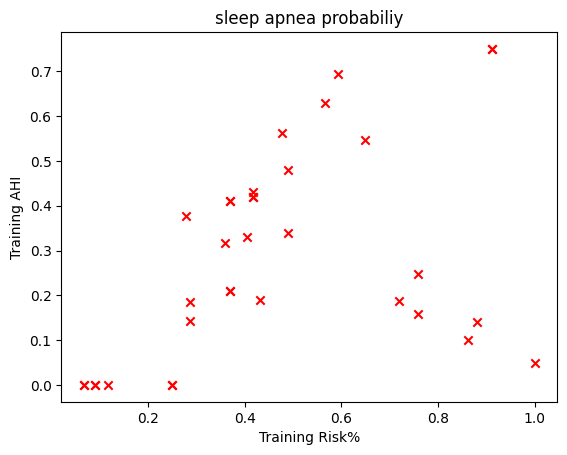

In [57]:
# Plot the data points
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("sleep apnea probabiliy")
# Set the y-axis label
plt.ylabel(f'Training {training_data[y_name].name}')
# Set the x-axis label
plt.xlabel(f'Training {training_data[x_name].name}')
plt.show()

In [58]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

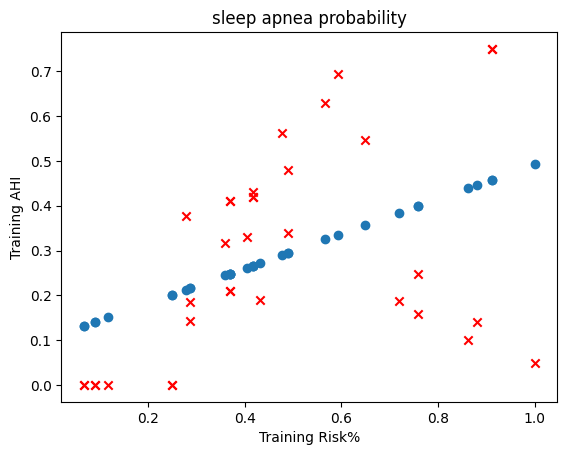

In [59]:
y_pred = my_model.predict(x)
plt.scatter(x, y_pred)
plt.scatter(x, y, marker='x', c='r')
plt.title("sleep apnea probability")
plt.ylabel(f'Training {training_data[y_name].name}')
plt.xlabel(f'Training {training_data[x_name].name}')
plt.show()

In [60]:
# save the model to disk
filename = 'apnea_model_v1.sav'
pickle.dump(my_model, open(filename, 'wb'))

In [61]:
training_data = pd.read_csv('training_data.csv')

x_name = ['Risk%']
y_name = 'AHI'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

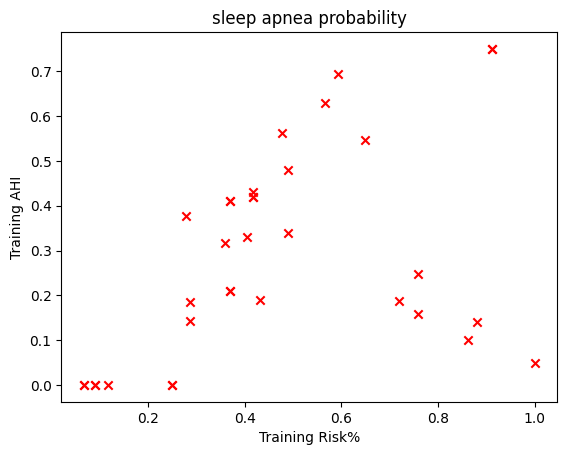

In [62]:
if(len(x_name) == 1):
    plt.scatter(x, y, marker='x', c='r')
    plt.title("sleep apnea probability")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3))
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("sleep apnea probability")
plt.show()

In [63]:
poly = PolynomialFeatures(degree=6, include_bias=False)
poly_features = poly.fit_transform(x)

# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(poly_features, y)

LinearRegression()

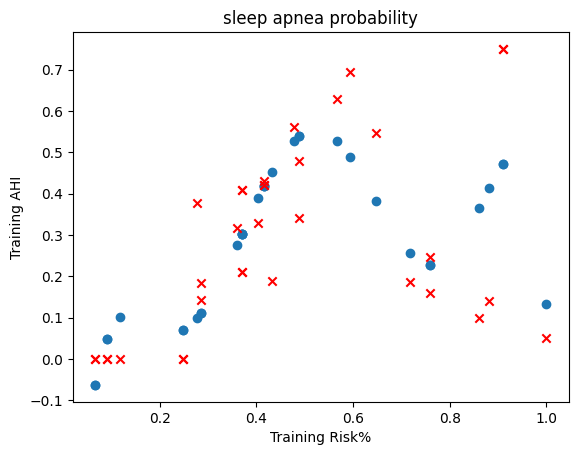

In [64]:
y_pred = my_model.predict(poly_features)
if(len(x_name) == 1):
    plt.scatter(x, y_pred)
    plt.scatter(x, y, marker='x', c='r')
    plt.title("sleep apnea probability")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
        ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("sleep apnea probability")
plt.show()

In [65]:
# save the model to disk
filename = 'apnea_model_poly.sav'
pickle.dump(my_model, open(filename, 'wb'))